In [181]:
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
games = pd.read_csv("steam.csv")

games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [183]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

# Data Exploration, Filtering, and Feature Engineering

1. Only english games
2. platform containing windows
3. games cheaper than $100

## 1. English vs. Non-english Games

In [184]:
games['english'].value_counts()

english
1    26564
0      511
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage of English vs. Non-English Games')

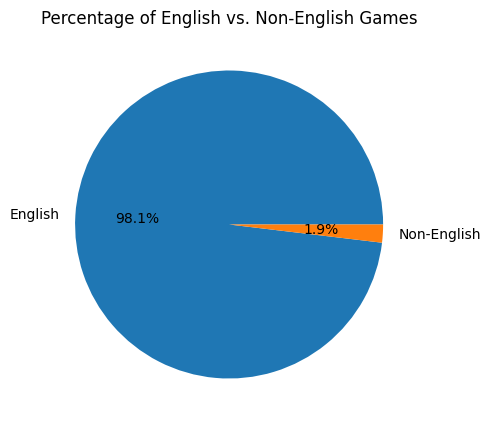

In [185]:
# Visualize proportion of english games
english_labels = ['English', 'Non-English']
english_data = games['english'].value_counts(normalize=True).values

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(english_data, labels=english_labels, autopct='%1.1f%%')

ax.set_title('Percentage of English vs. Non-English Games')

In [186]:
# Filtering 1: only enlgish games
games = games.loc[games['english'] == 1]
games.shape

(26564, 18)

## 2. Number of Games in Different Platforms

In [187]:
games['platforms'].value_counts()

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
mac                      3
mac;linux                1
linux                    1
Name: count, dtype: int64

In [188]:
platform_labels = ['windows', 'mac', 'linux']

platform_counts = {}
for platform in platform_labels:
    platform_counts[platform] = len(games.loc[games['platforms'].str.contains(platform)])/len(games)*100

platform_counts

{'windows': 99.981177533504,
 'mac': 30.17994277970185,
 'linux': 19.639361541936456}

Text(0, 0.5, 'Percentage out of Total Number of Games')

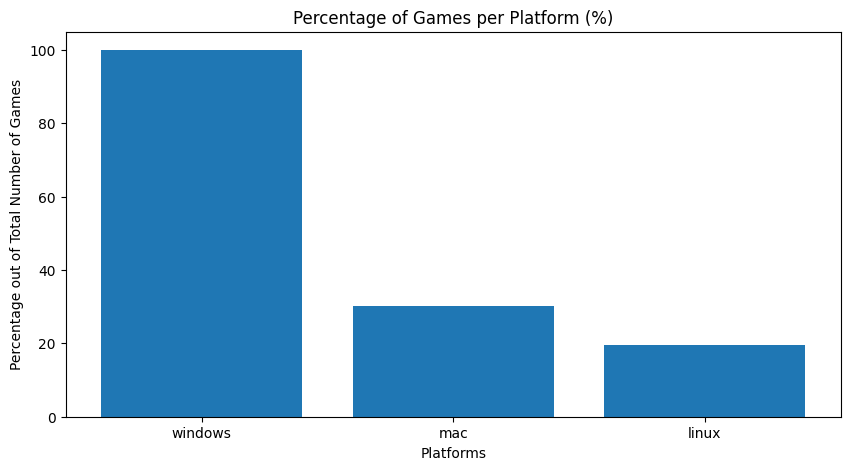

In [189]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(platform_labels, list(platform_counts.values()))
ax.set_title('Percentage of Games per Platform (%)')
ax.set_xlabel('Platforms')
ax.set_ylabel('Percentage out of Total Number of Games')

In [190]:
# Filtering 2: platforms containing windows
games = games[games['platforms'].str.contains('windows')]
games['platforms'].value_counts()

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
Name: count, dtype: int64

## 3. Distribution of Game Prices

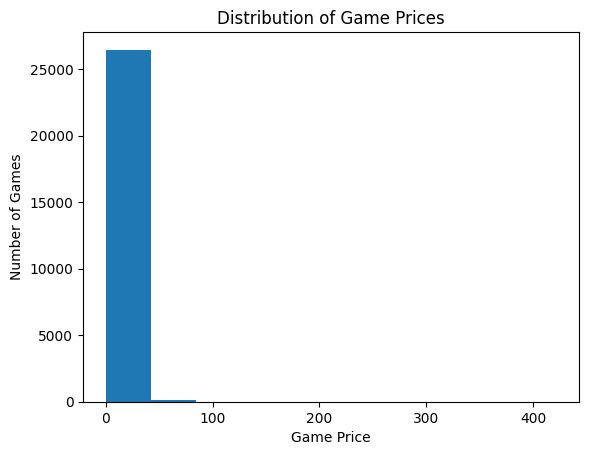

In [191]:
plt.hist(games['price'])
plt.title('Distribution of Game Prices')
plt.xlabel('Game Price')
plt.ylabel('Number of Games')
plt.show()

In [192]:
# Filtering 3: remove free games
games['price'].value_counts(normalize=True).sort_values(ascending=False)

price
3.99     0.119922
0.79     0.105840
0.00     0.092812
6.99     0.076998
7.19     0.048533
           ...   
0.85     0.000038
49.90    0.000038
3.02     0.000038
3.14     0.000038
6.10     0.000038
Name: proportion, Length: 278, dtype: float64

In [193]:
games = games.loc[(games['price'] > 0) & (games['price'] <= 100)]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24083 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             24083 non-null  int64  
 1   name              24083 non-null  object 
 2   release_date      24083 non-null  object 
 3   english           24083 non-null  int64  
 4   developer         24082 non-null  object 
 5   publisher         24073 non-null  object 
 6   platforms         24083 non-null  object 
 7   required_age      24083 non-null  int64  
 8   categories        24083 non-null  object 
 9   genres            24083 non-null  object 
 10  steamspy_tags     24083 non-null  object 
 11  achievements      24083 non-null  int64  
 12  positive_ratings  24083 non-null  int64  
 13  negative_ratings  24083 non-null  int64  
 14  average_playtime  24083 non-null  int64  
 15  median_playtime   24083 non-null  int64  
 16  owners            24083 non-null  object 
 17

## 4. Different Genres of Games

In [194]:
games['genres'].value_counts()
# Feature engineering 1: separate out columns

genres
Action;Indie                                                                 1791
Casual;Indie                                                                 1425
Action;Adventure;Indie                                                       1194
Adventure;Indie                                                              1107
Action;Casual;Indie                                                           977
                                                                             ... 
Action;Casual;Free to Play;Indie;RPG;Simulation;Strategy                        1
Nudity;Adventure;Casual                                                         1
Sexual Content;Simulation                                                       1
Action;Adventure;Indie;Massively Multiplayer;Racing;Simulation                  1
Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy       1
Name: count, Length: 1135, dtype: int64

In [195]:
games['positive_ratings'].describe()

count     24083.000000
mean        795.539343
std        7895.401122
min           0.000000
25%           6.000000
50%          22.000000
75%         113.000000
max      496184.000000
Name: positive_ratings, dtype: float64

In [196]:
games['owners'].value_counts()

owners
0-20000               17139
20000-50000            2584
50000-100000           1358
100000-200000          1153
200000-500000          1049
500000-1000000          400
1000000-2000000         228
2000000-5000000         127
5000000-10000000         32
10000000-20000000        12
50000000-100000000        1
Name: count, dtype: int64

### Feature Engineering 1: Encode different genres

In [197]:
games = games.reset_index().drop("index", axis=1)
games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [198]:
games['genres'] = games['genres'].str.split(";")


In [199]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binary_genres = mlb.fit_transform(games['genres'])

genre_names = list(mlb.classes_)

genres_encoded = pd.DataFrame(binary_genres, columns=genre_names)
games_merged = pd.concat([games, genres_encoded], axis=1)

games_merged.head()



,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Sexual Content,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],...,0,0,0,0,0,0,0,0,0,0


In [200]:
# genre counts
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(games_merged.loc[games_merged[genre] == 1])

# top 5 genres with most number of games
top_5_genres = [genre[0] for genre in sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]]
top_5_genres

['Indie', 'Action', 'Casual', 'Adventure', 'Simulation']

In [201]:
# Sort and normalize the counts
top_5_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]
total_counts = len(games_merged)
top_5_genre_counts = {item[0]: item[1]/total_counts for item in top_5_genres}

Text(0.5, 1.0, 'Normalized Number of Games in Top 5 Most Popular Genres')

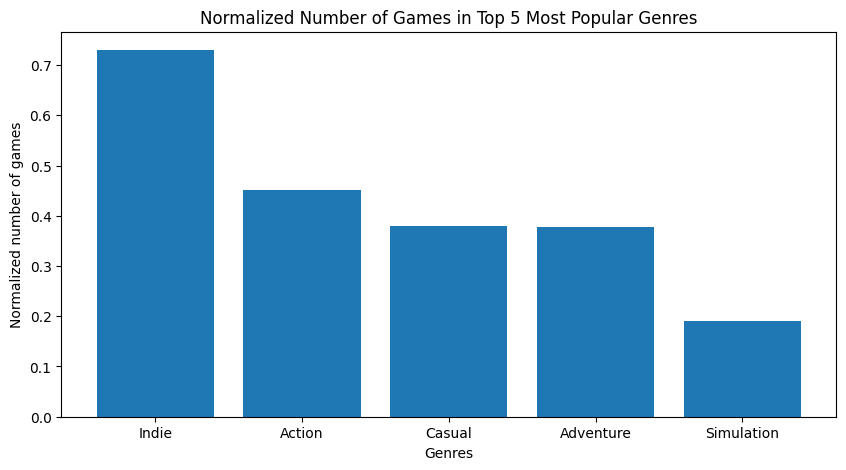

In [202]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top_5_genre_counts.keys(), top_5_genre_counts.values())
ax.set_xlabel('Genres')
ax.set_ylabel('Normalized number of games')
ax.set_title('Normalized Number of Games in Top 5 Most Popular Genres')

## 5. Ratings and Sales

### Feature Engineering 2: Create `rating_num`, `positive_ratio`, `sales_average` columns

In [203]:
# Create positive_ratio column (proportion of number of positive ratings to total number of ratings)
def get_rating_ratio(df):
    df['rating_num'] = df['positive_ratings'] + df['negative_ratings']
    df['positive_ratio'] = df['positive_ratings'] / df['rating_num']

In [204]:
def get_low_high_sales(df):
    df[['owners_low', 'owners_high']] = df['owners'].str.split("-", expand=True).astype(int)
    df['sales_low'] = df['owners_low'] * df['price']
    df['sales_high'] = df['owners_high'] * df['price']


In [205]:
def get_average_sales(df):
    df['sales_average'] = (df['sales_high'] + df['sales_low'])/2

In [206]:
get_rating_ratio(games_merged)
get_low_high_sales(games_merged)
get_average_sales(games_merged)
games_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Video Production,Violent,Web Publishing,rating_num,positive_ratio,owners_low,owners_high,sales_low,sales_high,sales_average
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,127873,0.973888,10000000,20000000,71900000.0,143800000.0,107850000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,3951,0.839787,5000000,10000000,19950000.0,39900000.0,29925000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],...,0,0,0,3814,0.895648,5000000,10000000,19950000.0,39900000.0,29925000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,1540,0.826623,5000000,10000000,19950000.0,39900000.0,29925000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],...,0,0,0,5538,0.947996,5000000,10000000,19950000.0,39900000.0,29925000.0


### Remove outliers from `sales_average` columns

In [207]:
import numpy as np
from scipy import stats

games_merged = games_merged[(np.abs(stats.zscore(games_merged['sales_average'])) < 3)]
games_merged.shape


(23958, 54)

In [208]:
games_merged = games_merged.reset_index().drop("index", axis=1)

In [209]:
games_merged['sales_average'].describe()

count    2.395800e+04
mean     7.136054e+05
std      3.166173e+06
min      7.200000e+03
25%      2.890000e+04
50%      6.965000e+04
75%      1.549000e+05
max      4.498500e+07
Name: sales_average, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2aeaf4430>,
 'caps': [<matplotlib.lines.Line2D at 0x2aeb283a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aeaf5240>],
 'medians': [<matplotlib.lines.Line2D at 0x2aecbc610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aecbcb80>],
 'means': []}

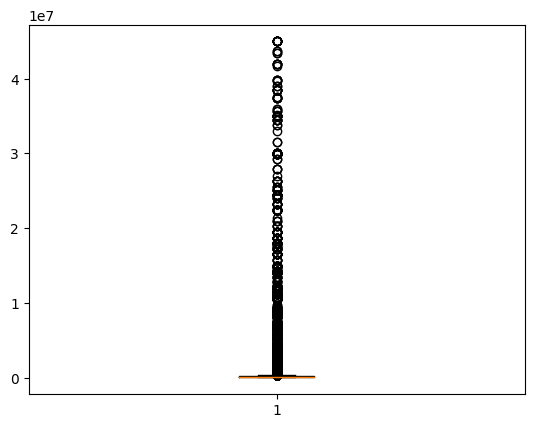

In [210]:
plt.boxplot(games_merged['sales_average'])

(array([2.3106e+04, 3.9800e+02, 1.4700e+02, 1.0300e+02, 6.4000e+01,
        3.9000e+01, 3.4000e+01, 2.5000e+01, 2.1000e+01, 2.1000e+01]),
 array([7.200000e+03, 4.504980e+06, 9.002760e+06, 1.350054e+07,
        1.799832e+07, 2.249610e+07, 2.699388e+07, 3.149166e+07,
        3.598944e+07, 4.048722e+07, 4.498500e+07]),
 <BarContainer object of 10 artists>)

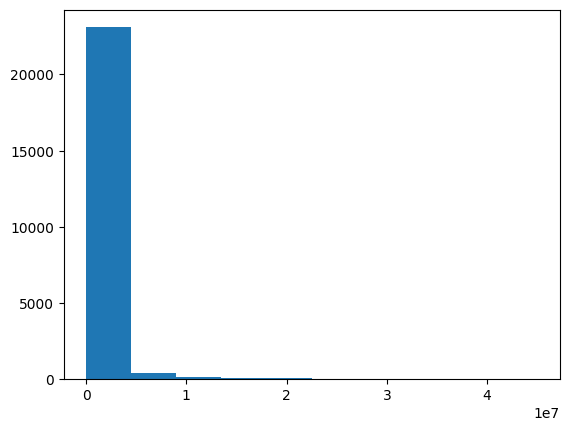

In [211]:
plt.hist(games_merged['sales_average'])

The `sales_average` column is already a calcualted variable from low and high points of owners multiplied by unit price. Since it is a calculated variable, it is binned to different levels of sales. This can also help with business interpretability.

## Categorize `sales_average` column into `low`, `medium`, and `high`

In [212]:
# Feature Engineering 3-2: Bin Sales
# 3-2-1 3 bins (25 and 75th percentiles)

# define cutoff values 
bins = [games_merged['sales_average'].min(), games_merged['sales_average'].describe()[4], games_merged['sales_average'].describe()[6], games_merged['sales_average'].max()]

# define labels
labels = ['low', 'medium', 'high']

# categorize sales_average
games_merged['sales_category'] = pd.cut(games_merged['sales_average'], bins=bins, labels=labels)

In [213]:
games_merged.loc[games_merged['sales_category'].isna()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Violent,Web Publishing,rating_num,positive_ratio,owners_low,owners_high,sales_low,sales_high,sales_average,sales_category
17005,760740,Polaris,2017-12-20,1,Vyacheslav Notbad,Zotdinex,windows,0,Single-player,[Casual],...,0,0,7,0.571429,0,20000,0.0,14400.0,7200.0,NaN
20939,892910,Space Wars,2018-07-23,1,Star Studios,Star Studios,windows;mac;linux,0,Single-player;Full controller support,"[Action, Casual, Indie]",...,0,0,3,0.666667,0,20000,0.0,14400.0,7200.0,NaN


In [220]:
games_merged['sales_average'].value_counts().sort_index()

sales_average
7200.0           2
7400.0           1
7700.0           1
7800.0          22
7900.0        2179
              ... 
41685000.0       1
41965000.0       5
43425000.0       2
43715000.0       2
44985000.0      11
Name: count, Length: 696, dtype: int64

In [214]:
games_merged['sales_category'].value_counts(normalize=True)

sales_category
medium    0.479212
low       0.273001
high      0.247788
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage of Different Sales Levels')

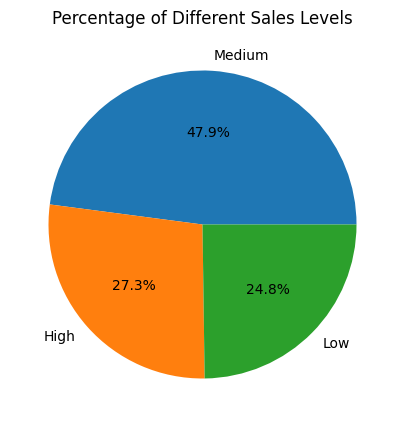

In [215]:
# Visualize proportion of different categories of sales
sales_labels = ['Medium', 'High', 'Low']
sales_data = games_merged['sales_category'].value_counts(normalize=True).values

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(sales_data, labels=sales_labels, autopct='%1.1f%%')

ax.set_title('Percentage of Different Sales Levels')

# Pre-processing Before Classification Models

In [216]:
relevant_columns = ['appid', 'name', 'rating_num', 'positive_ratio'] + genre_names
len(relevant_columns)

33

In [217]:
from sklearn.model_selection import train_test_split

X = games_merged[relevant_columns]
y = games_merged['sales_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)